In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
##https://www.kaggle.com/code/hidayatzeb/diabetes-data-prediction#Visualization-the-performance-of-all-the-models

In [3]:
df = pd.read_csv('./pima-indians-diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetespedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetespedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetespedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed in df.describe
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [8]:
#replacing 0 values with median of that column
#df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
#df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
#df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
#df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
#df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

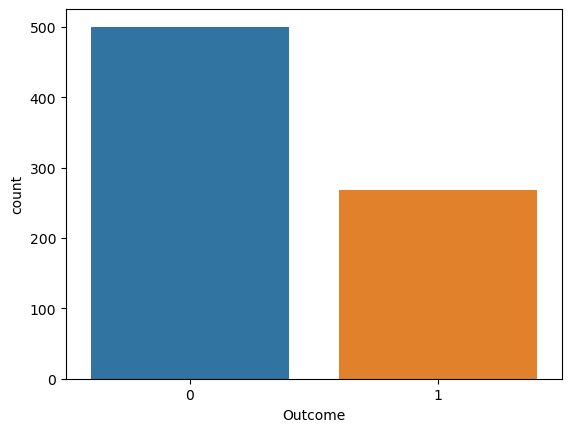

In [9]:
# Distribution of Outcome
sns.countplot(x='Outcome', data=df)
plt.show()

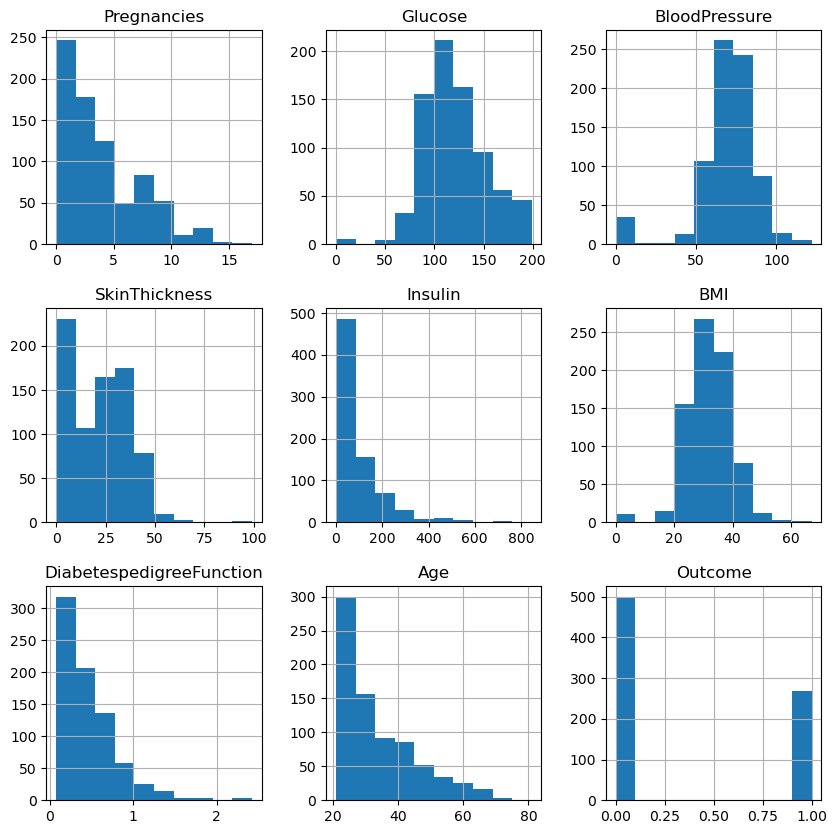

In [10]:
df.hist(bins=10,figsize=(10,10))
plt.show()

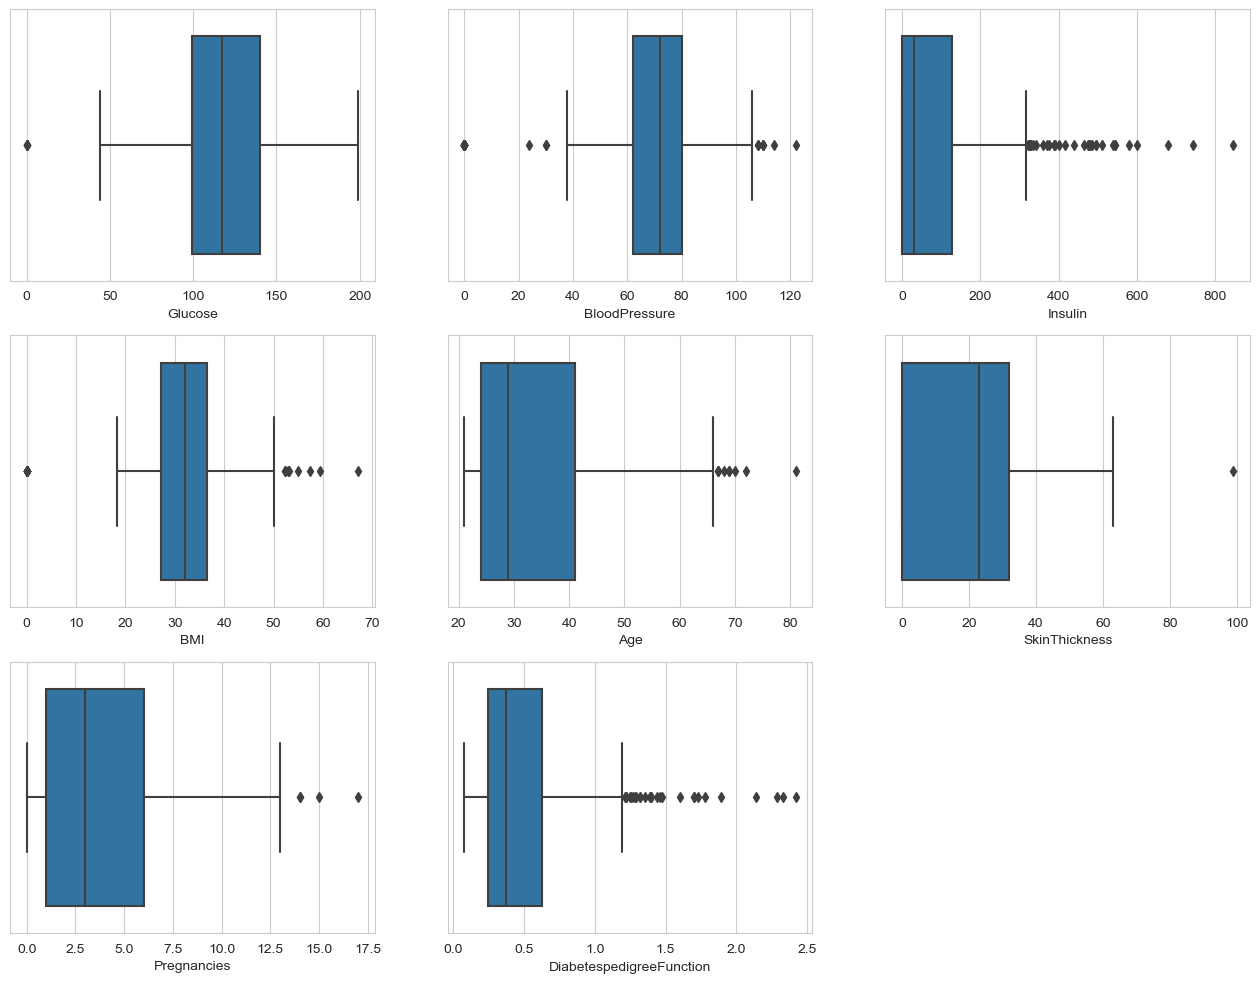

In [11]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetespedigreeFunction',data=df)
plt.show()

<Axes: >

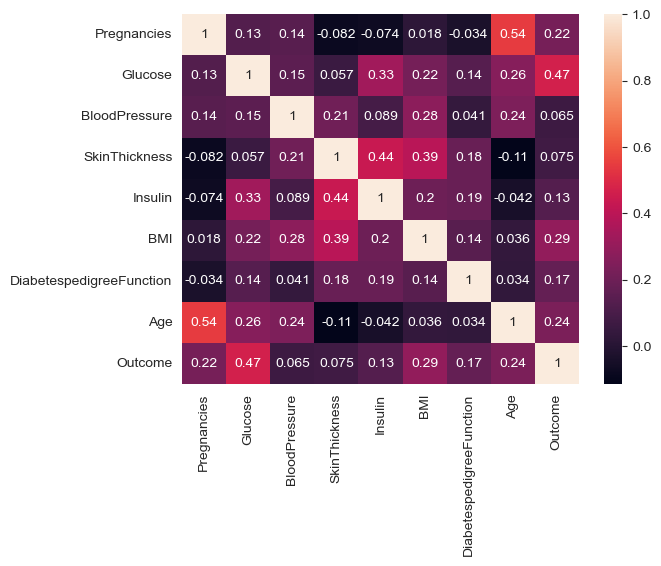

In [12]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.drop(['Outcome'],axis = 1)  #independent columns
y = df['Outcome']    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                      Specs        Score
4                   Insulin  2175.565273
1                   Glucose  1411.887041
7                       Age   181.303689
5                       BMI   127.669343
0               Pregnancies   111.519691
3             SkinThickness    53.108040
2             BloodPressure    17.605373
6  DiabetespedigreeFunction     5.392682


In [14]:
#data_sf = df.drop(['DiabetespedigreeFunction','BloodPressure','SkinThickness'], axis = 1)
#data_sf.columns

[0.10766531 0.233298   0.10075382 0.08070141 0.07272939 0.1417993
 0.11997708 0.14307569]


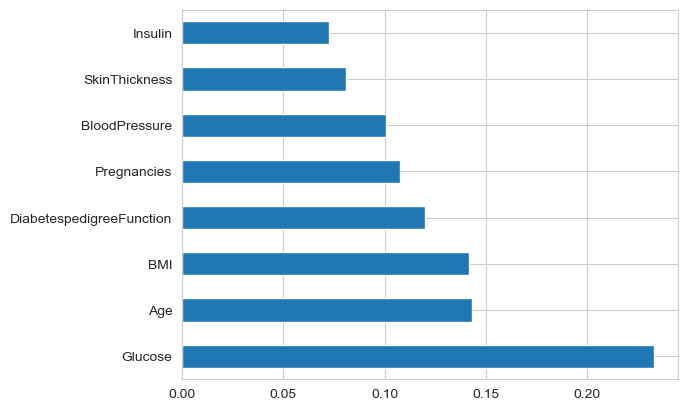

In [15]:
X = df.drop(['Outcome'],axis = 1)  #independent columns
y = df['Outcome']    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [16]:
#from sklearn.preprocessing import QuantileTransformer
#x=data_sf
#quantile  = QuantileTransformer()
#X = quantile.fit_transform(x)
#df_new=quantile.transform(X)
#df_new=pd.DataFrame(X)
#df_new.columns =['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age', 'Outcome']
#df_new.head()

In [17]:
#plt.figure(figsize=(16,12))
#sns.set_style(style='whitegrid')
#plt.subplot(3,3,1)
#sns.boxplot(x=df_new['Glucose'],data=df_new)
#plt.subplot(3,3,2)
#sns.boxplot(x=df_new['BMI'],data=df_new)
#plt.subplot(3,3,3)
#sns.boxplot(x=df_new['Pregnancies'],data=df_new)
#plt.subplot(3,3,4)
#sns.boxplot(x=df_new['Age'],data=df_new)
#plt.subplot(3,3,5)
#sns.boxplot(x=df_new['Insulin'],data=df_new)

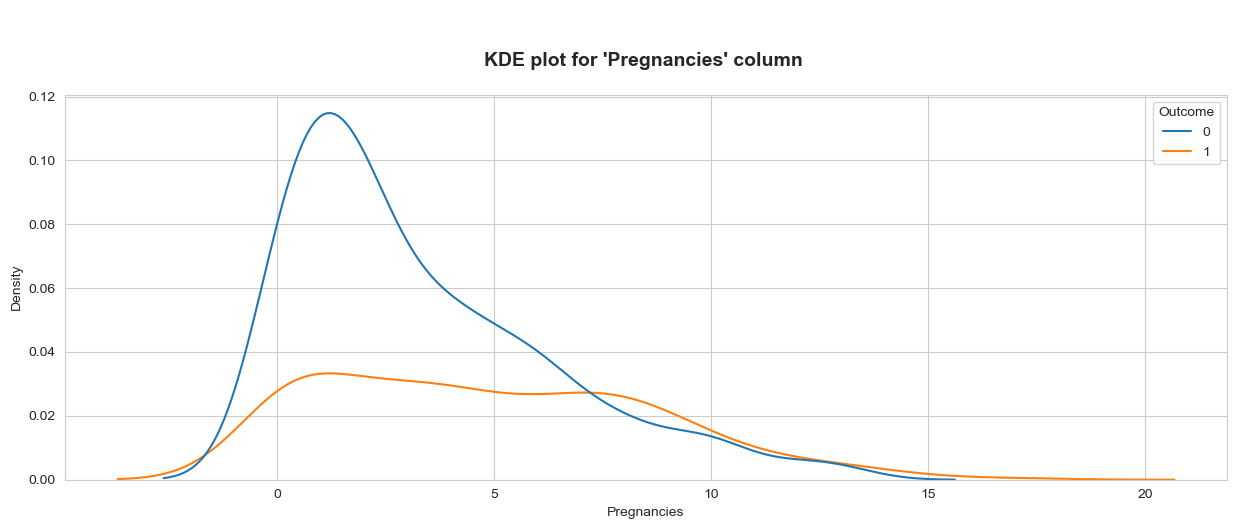

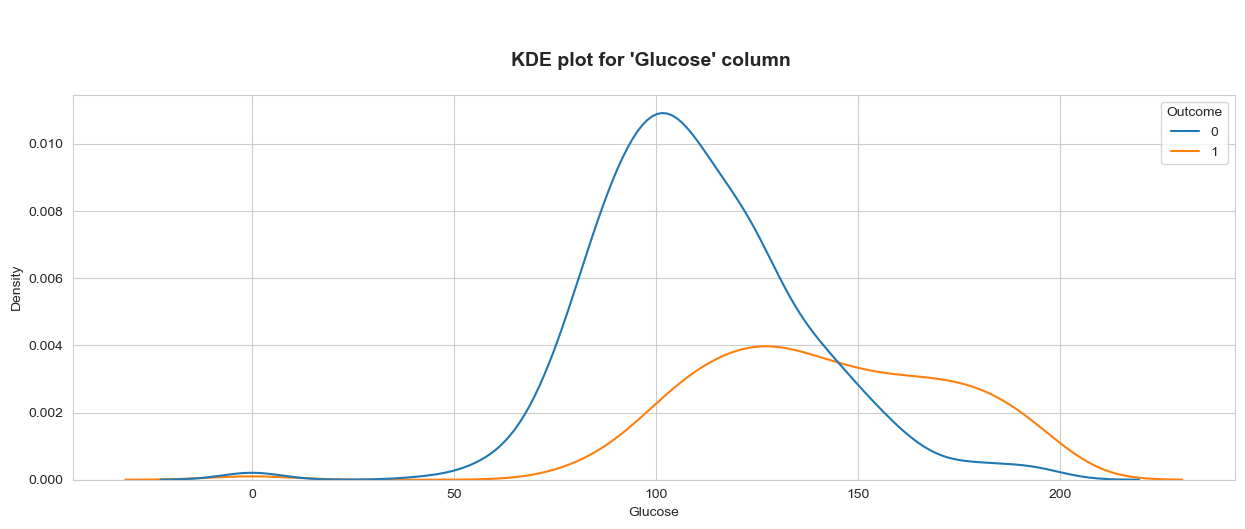

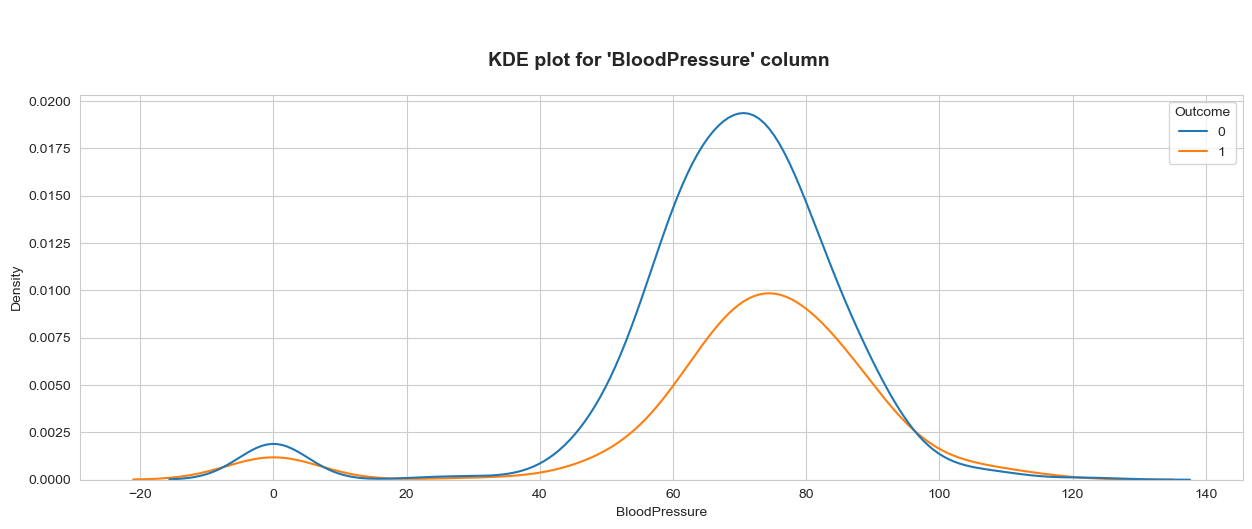

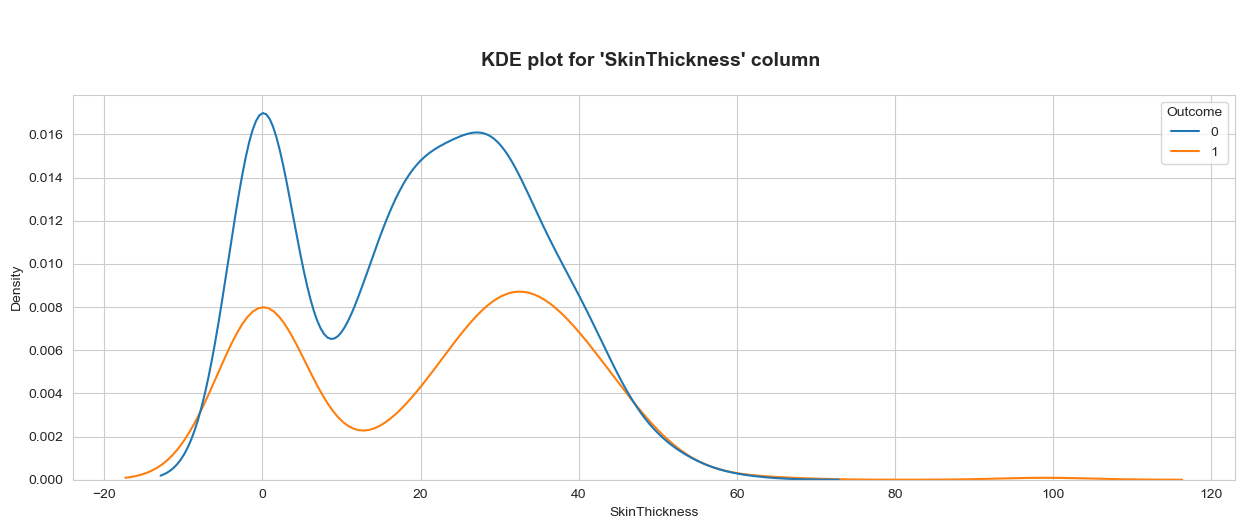

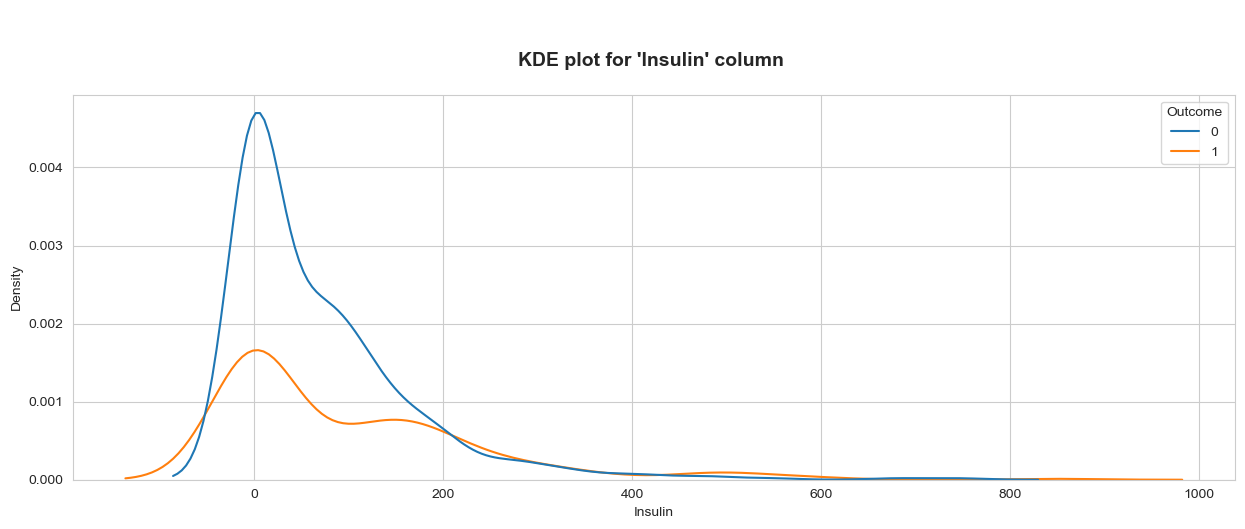

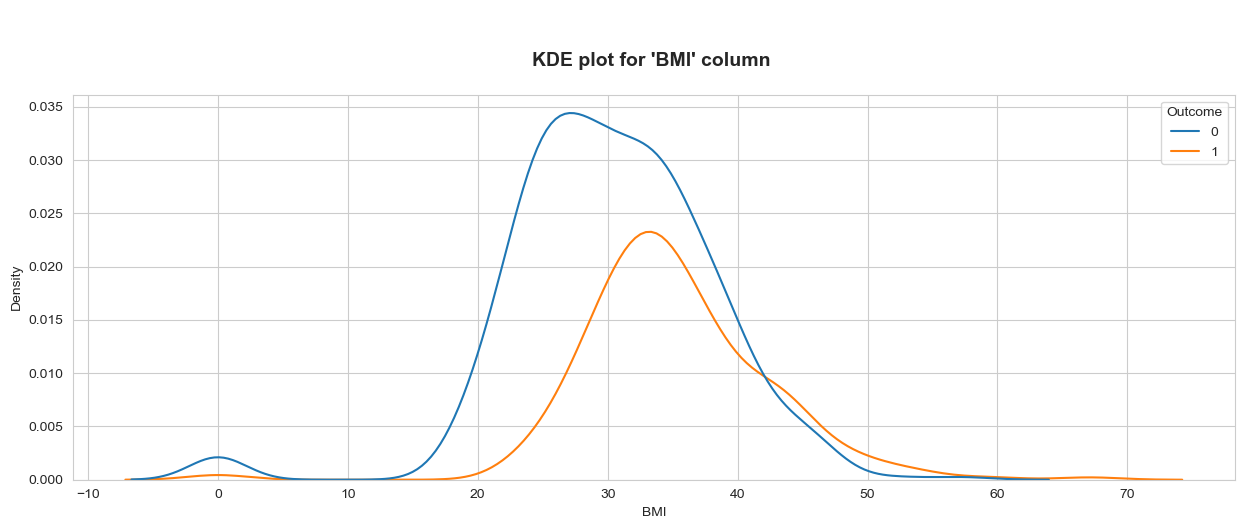

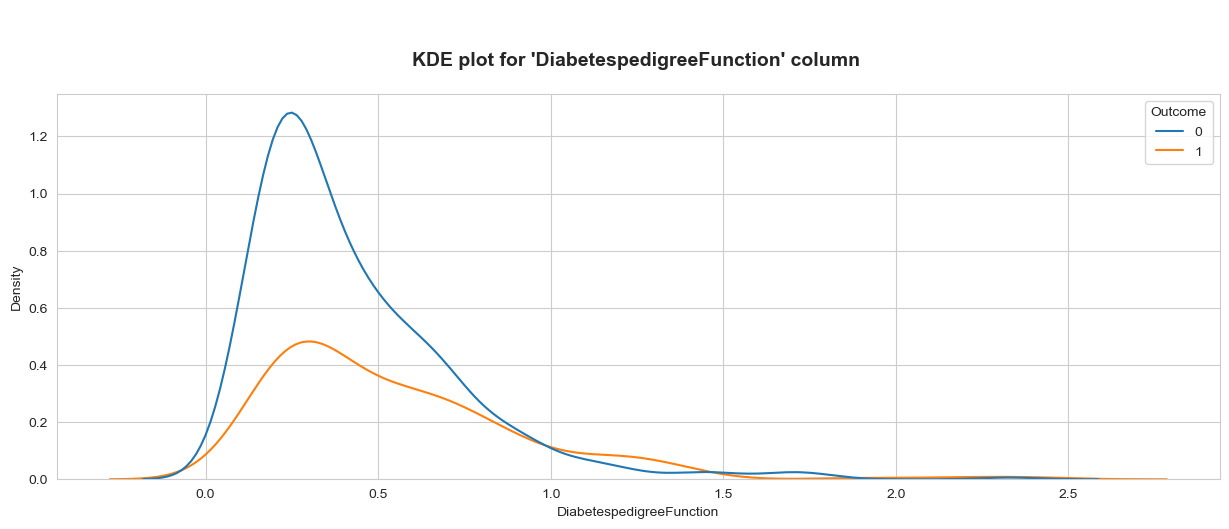

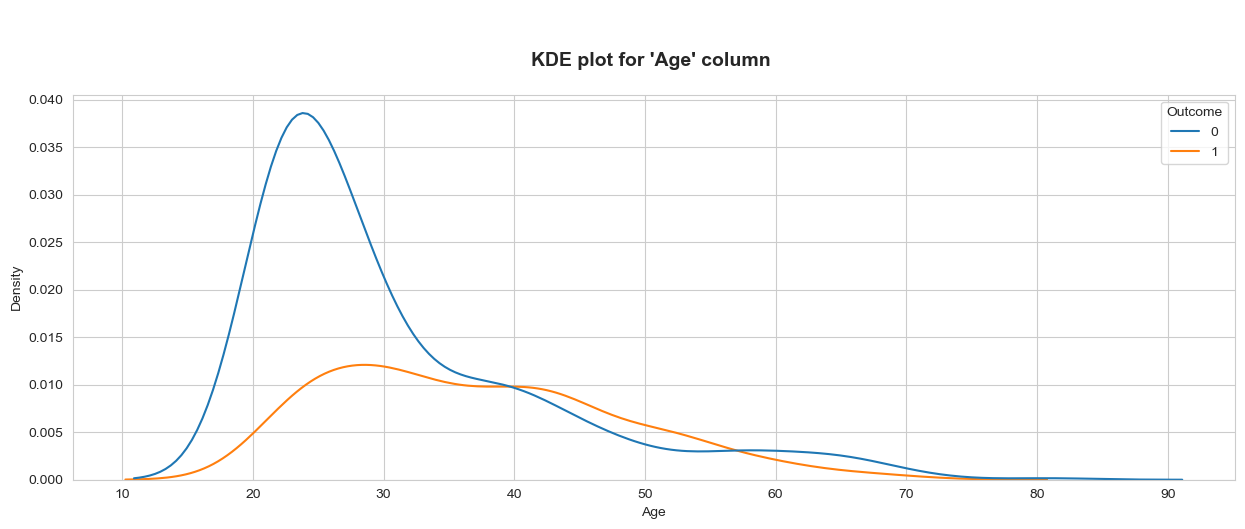

In [18]:
col1=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetespedigreeFunction', 'Age']
for c in col1:
    plt.figure(figsize=(15,5))
    sns.kdeplot(x=df[c],hue = df.Outcome)
    plt.title(f"\n\nKDE plot for '{c}' column \n", size=14, fontweight='bold')
    plt.show()

In [19]:
# Split data into features and target
#y = df_new['Outcome']
#X = df_new.drop(['Outcome'],axis = 1)
#X.head()

In [20]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize/normalize your features (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Define a dictionary to store the results of each model
results = {}

In [22]:
#Fitting  KNeighbors Classifier model to the Traning Set
from sklearn.neighbors import KNeighborsClassifier 
KN = KNeighborsClassifier
knn = KN(n_neighbors=7)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

In [23]:
# Evaluate the KNN model
from sklearn import metrics

KNN_accuracy = metrics.accuracy_score(y_test, knn_y_pred)
KNN_precision = metrics.precision_score(y_test, knn_y_pred)
KNN_recall = metrics.recall_score(y_test, knn_y_pred)
KNN_f1 = metrics.f1_score(y_test, knn_y_pred)
KNN_error_rate = 1 - KNN_accuracy  #

# Store the results of KNN model in the dictionary
results["KNN"] = {"accuracy": KNN_accuracy,
                  "precision": KNN_precision,
                  "recall": KNN_recall,
                  "f1_score": KNN_f1,
                  "error_rate":KNN_error_rate  #
                 }

In [24]:
#Fitting The Random Forest Classifier model to the Traning Set
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state = 0)
RF.fit(X_train,y_train)
RF_y_pred = RF.predict(X_test)

In [25]:
# Evaluate the Random Forest Classifier model
RF_accuracy = metrics.accuracy_score(y_test, RF_y_pred)
RF_precision = metrics.precision_score(y_test, RF_y_pred)
RF_recall = metrics.recall_score(y_test, RF_y_pred)
RF_f1 = metrics.f1_score(y_test, RF_y_pred)
RF_error_rate = 1 - RF_accuracy


# Store the results of Random Forest model in the dictionary
results["RF"] = {"accuracy": RF_accuracy,
                  "precision": RF_precision,
                  "recall": RF_recall,
                  "f1_score": RF_f1,
                  "error_rate": RF_error_rate
                 }

In [26]:
#Fitting The Decision Tree Classifier model to the Traning Set
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
DT_y_pred = DT.predict(X_test)

In [27]:
# Evaluate the Decision Tree Classifier model
DT_accuracy = metrics.accuracy_score(y_test, DT_y_pred)
DT_precision = metrics.precision_score(y_test, DT_y_pred)
DT_recall = metrics.recall_score(y_test, DT_y_pred)
DT_f1 = metrics.f1_score(y_test, DT_y_pred)
DT_error_rate = 1 - DT_accuracy

# Store the results of Decision Tree model in the dictionary
results["DT"] = {"accuracy": DT_accuracy,
                  "precision": DT_precision,
                  "recall": DT_recall,
                  "f1_score": DT_f1,
                  "error_rate": DT_error_rate
                 }

In [28]:
#Fitting The LogisticRegression Classifier model to the Traning Set
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
LR_y_pred = LR.predict(X_test)

In [29]:
# Evaluate the LogisticRegression Classifier model
LR_accuracy = metrics.accuracy_score(y_test, LR_y_pred)
LR_precision = metrics.precision_score(y_test, LR_y_pred)
LR_recall = metrics.recall_score(y_test, LR_y_pred)
LR_f1 = metrics.f1_score(y_test, LR_y_pred)
LR_error_rate = 1 - LR_accuracy

# Store the results of LogisticRegression model in the dictionary
results["LR"] = {"accuracy": LR_accuracy,
                  "precision": LR_precision,
                  "recall": LR_recall,
                  "f1_score": LR_f1,
                  "error_rate": LR_error_rate
                 }

In [30]:
#Fitting The GaussianNB Classifier model to the Traning Set
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train,y_train)
GNB_y_pred = GNB.predict(X_test)

In [31]:
# Evaluate the GNB Classifier model
GNB_accuracy = metrics.accuracy_score(y_test, GNB_y_pred)
GNB_precision = metrics.precision_score(y_test, GNB_y_pred)
GNB_recall = metrics.recall_score(y_test, GNB_y_pred)
GNB_f1 = metrics.f1_score(y_test, GNB_y_pred)
GNB_error_rate = 1 - GNB_accuracy

# Store the results of LogisticRegression model in the dictionary
results["GNB"] = {"accuracy": GNB_accuracy,
                  "precision": GNB_precision,
                  "recall": GNB_recall,
                  "f1_score": GNB_f1,
                  "error_rate": GNB_error_rate
                 }

In [32]:
#Fitting The SVM Classifier model to the Traning Set
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train,y_train)
SVM_y_pred = SVM.predict(X_test)

In [33]:
# Evaluate the SVM Classifier model
SVM_accuracy = metrics.accuracy_score(y_test, SVM_y_pred)
SVM_precision = metrics.precision_score(y_test, SVM_y_pred)
SVM_recall = metrics.recall_score(y_test, SVM_y_pred)
SVM_f1 = metrics.f1_score(y_test, SVM_y_pred)
SVM_error_rate = 1 - SVM_accuracy

# Store the results of LogisticRegression model in the dictionary
results["SVM"] = {"accuracy": SVM_accuracy,
                  "precision": SVM_precision,
                  "recall": SVM_recall,
                  "f1_score": SVM_f1,
                  "error_rate": SVM_error_rate
                 }

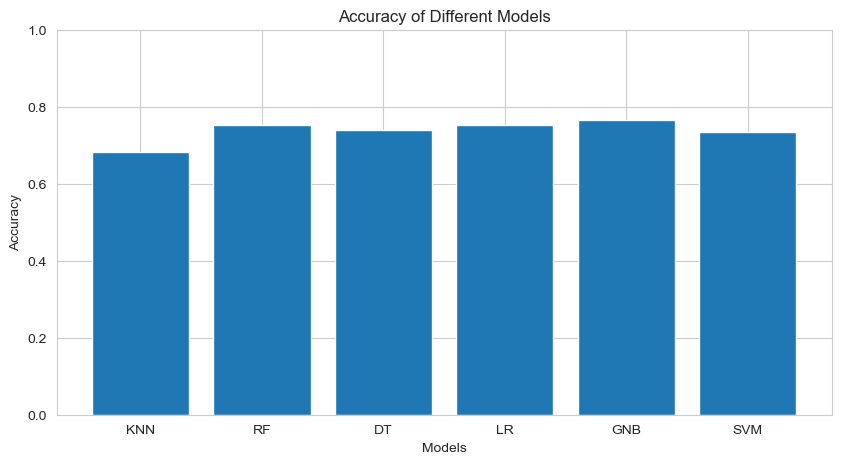

In [34]:
# Plot the accuracy of all models
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["accuracy"] for result in results.values()])
plt.title("Accuracy of Different Models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

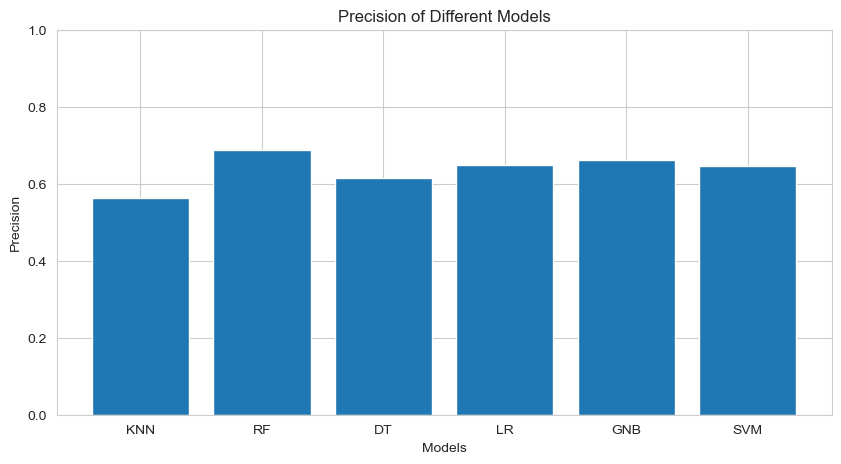

In [35]:
# Plot the precision of all models
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["precision"] for result in results.values()])
plt.title("Precision of Different Models")
plt.xlabel("Models")
plt.ylabel("Precision")
plt.ylim(0, 1)
plt.show()

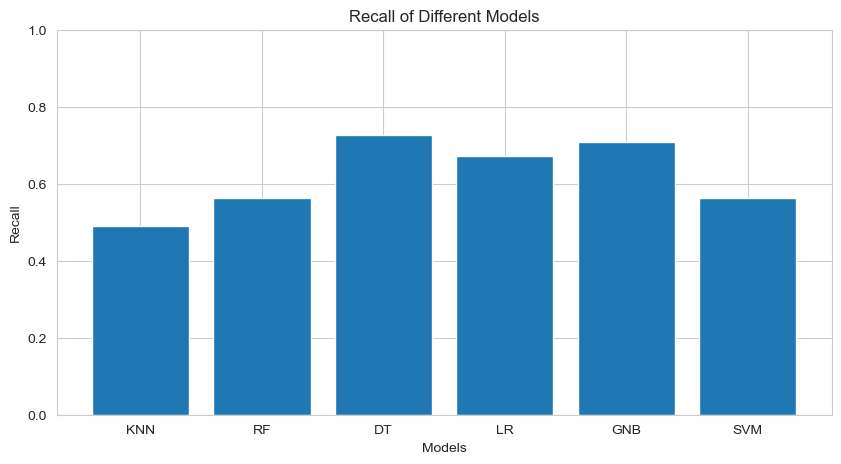

In [36]:
# Plot the recall of all models
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["recall"] for result in results.values()])
plt.title("Recall of Different Models")
plt.xlabel("Models")
plt.ylabel("Recall")
plt.ylim(0, 1)
plt.show()

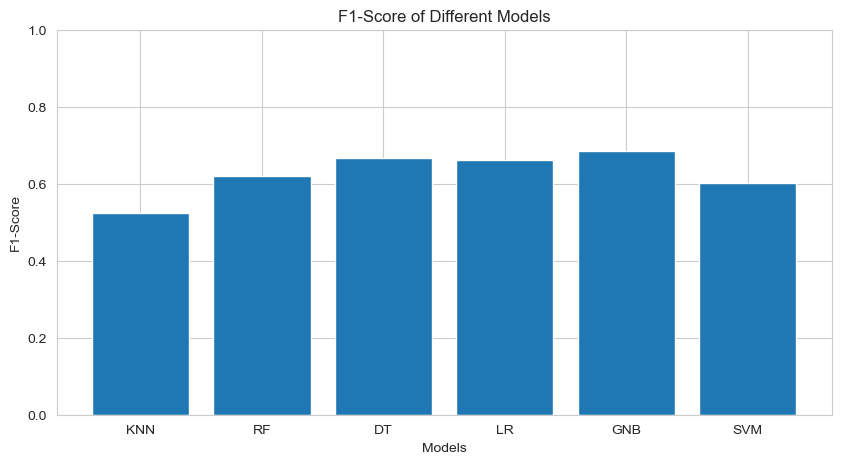

In [37]:
# Plot the F1-score of all models
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["f1_score"] for result in results.values()])
plt.title("F1-Score of Different Models")
plt.xlabel("Models")
plt.ylabel("F1-Score")
plt.ylim(0, 1)
plt.show()


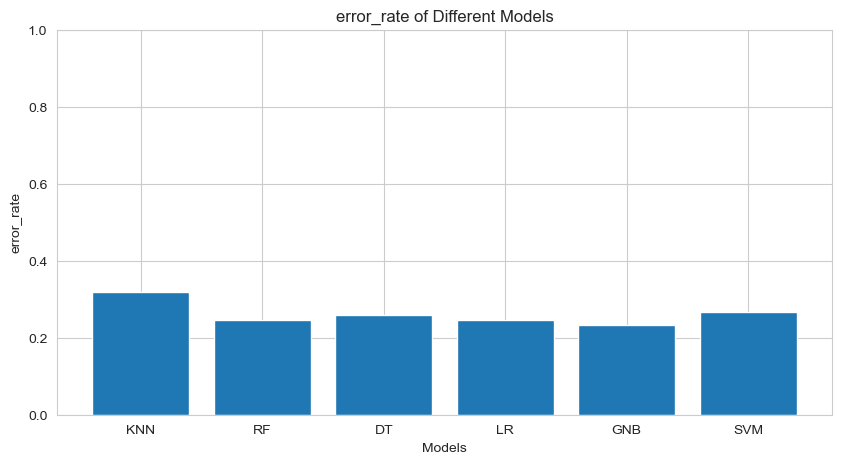

In [38]:
# Plot the error_rate of all models
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["error_rate"] for result in results.values()])
plt.title("error_rate of Different Models")
plt.xlabel("Models")
plt.ylabel("error_rate")
plt.ylim(0, 1)
plt.show()

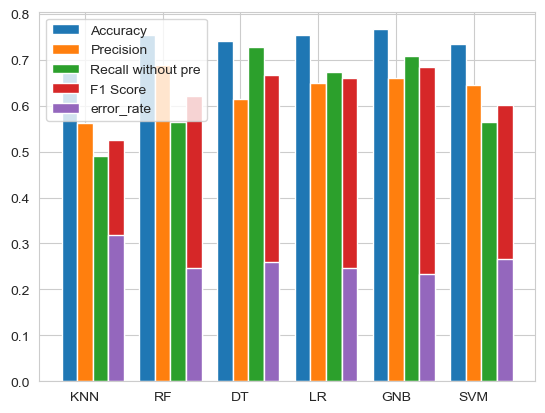

In [39]:
# extract metrics values
import numpy as np
accuracies = [results[model]['accuracy'] for model in results]
precisions = [results[model]['precision'] for model in results]
recalls = [results[model]['recall'] for model in results]
f1_scores = [results[model]['f1_score'] for model in results]
error_rate = [results[model]['error_rate'] for model in results]

# plot bar chart
bar_width = 0.2
index = np.arange(len(results))

plt.bar(index, accuracies, bar_width, label='Accuracy')
plt.bar(index + bar_width, precisions, bar_width, label='Precision')
plt.bar(index + 2 * bar_width, recalls, bar_width, label='Recall without pre')
plt.bar(index + 3 * bar_width, f1_scores, bar_width, label='F1 Score')
plt.bar(index + 3 * bar_width, error_rate, bar_width, label='error_rate')

plt.xticks(index + bar_width, list(results.keys()))
plt.legend()
plt.show()

In [40]:
print(recalls)

[0.4909090909090909, 0.5636363636363636, 0.7272727272727273, 0.6727272727272727, 0.7090909090909091, 0.5636363636363636]
